In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import  random

from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten
from keras import regularizers
from keras.preprocessing.image import  ImageDataGenerator
import os
from keras.callbacks import  EarlyStopping

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 1672 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.


In [ ]:
print("class_indices:",train_generator.class_indices)
print("class_mode:",val_generator.class_mode)
print("classes:",val_generator.classes)

Found 1672 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.


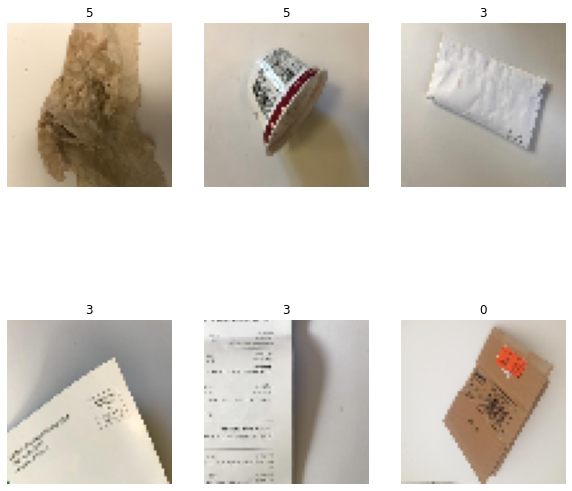

In [151]:
train_path='/content/drive/MyDrive/Deep Learning/odev_Dataset/train/'
test_path='/content/drive/MyDrive/Deep Learning/odev_Dataset/test'

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.5,         
    zoom_range=0.1,        
    horizontal_flip=True,   
    validation_split=0.2
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1) #%10 istendi
test_datagen=ImageDataGenerator(rescale=1./255)


x,y=(64,64) #image widht,height
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(x,y),         
    class_mode='categorical',  
    batch_size=128,        
    subset='training'    
)

val_generator=val_datagen.flow_from_directory( 
    train_path,
    target_size=(x,y),
    shuffle=False,
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory( 
    test_path,
    target_size=(x,y),
    shuffle=True,
    class_mode='categorical',
    batch_size=1    
)



plt.figure(figsize=(10,10))

for i in range(6):
  img,y=test_generator.next()
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(list(y[:195][0]).index(1))
  plt.imshow(img[0])


In [153]:
model=Sequential()
model.add(Flatten(input_shape=(64,64,3)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(6,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

model.summary()

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//128,
    validation_data=val_generator,
    epochs=300,
    validation_steps=val_generator.samples//128
)

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_74 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_230 (Dense)            (None, 64)                786496    
_________________________________________________________________
dense_231 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_232 (Dense)            (None, 6)                 390       
Total params: 791,046
Trainable params: 791,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 12s 915ms/step - loss: 3.7539 - accuracy: 0.2005 - val_loss: 2.0809 - val_accuracy: 0.2500
Epoch 2/300
13/13 [==============================] - 11s 829ms/step - loss: 2.0646 - accuracy: 0.2016

Text(0.5, 1.0, 'Accuracy Curves')

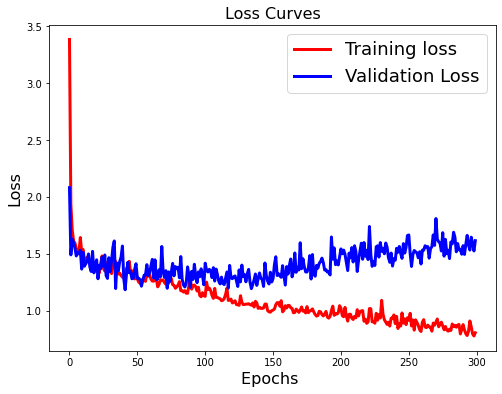

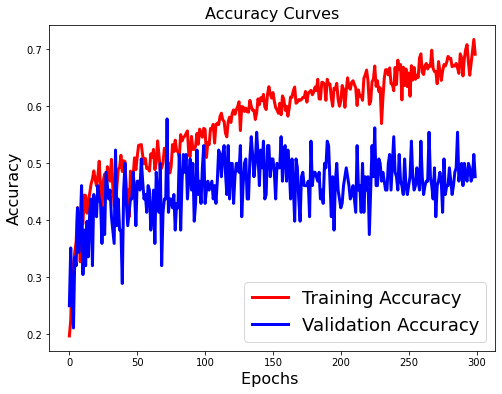

In [154]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)